In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
df = pd.read_excel("/Users/farihaparvin/Downloads/Social Media Usage.xlsx", sheet_name='Cleansed Data', engine='openpyxl')

## Time spent on Social Media vs RSES Score, BSMAS Score, Percieved Anxiety and Loneliness
---

In [5]:
# Time labels for graphs:

time_labels = {
    0: '0–2h',
    1: '2–4h',
    2: '4–6h',
    3: '6–8h',
    4: '8–10h',
    5: '10h+'
}
df['Time Category'] = df['Time spent on social media'].map(time_labels)
ordered_categories = ['0–2h', '2–4h', '4–6h', '6–8h', '8–10h', '10h+']

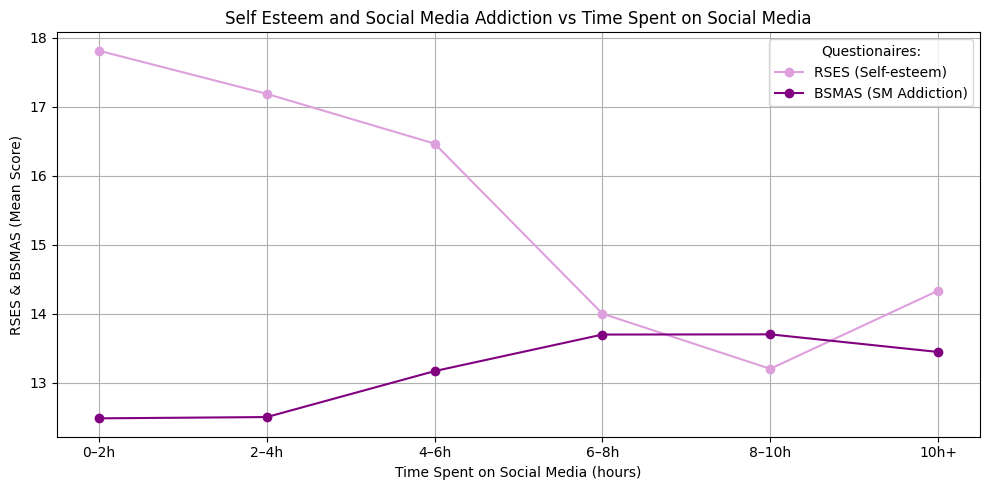

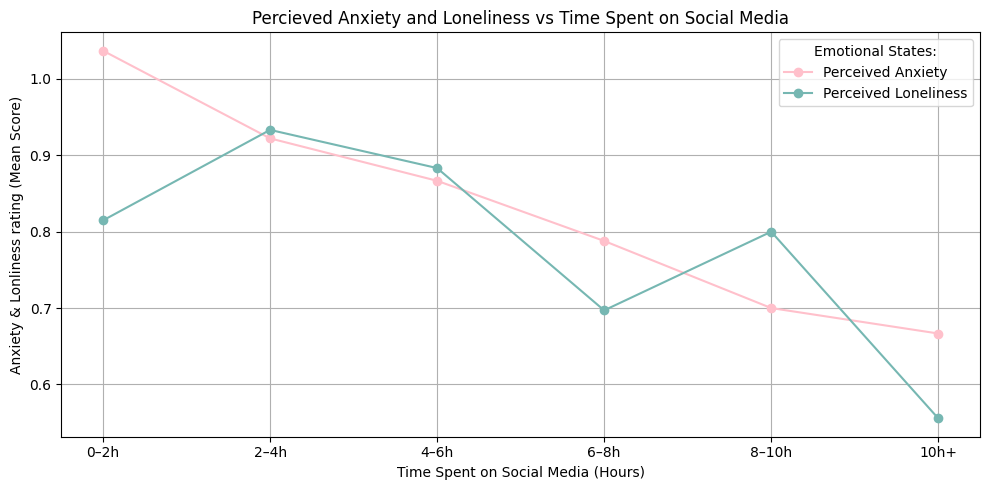

In [6]:
grouped_means = df.groupby('Time Category')[['RSES', 'BSMAS', 'Perceived loneliness', 'Perceived anxiety during SM use']].mean()
grouped_means = grouped_means.loc[ordered_categories]

# Graph 1 (Self esteem & Soial Media addiction vs Time Spend on Soical Media)
plt.figure(figsize=(10, 5))
plt.plot(grouped_means.index, grouped_means['RSES'], label='RSES (Self-esteem)', marker='o', color='#DDA0DD')
plt.plot(grouped_means.index, grouped_means['BSMAS'], label='BSMAS (SM Addiction)', marker='o', color='#800080')
plt.xlabel('Time Spent on Social Media (hours)')
plt.ylabel('RSES & BSMAS (Mean Score)')
plt.title('Self Esteem and Social Media Addiction vs Time Spent on Social Media')
plt.legend(title='Questionaires:')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 2 (Percieved Anxiety and Lonliness vs Time spent on Soical Media)
plt.figure(figsize=(10, 5))
plt.plot(grouped_means.index, grouped_means['Perceived anxiety during SM use'], label='Perceived Anxiety', marker='o', color='#FFC0CB')
plt.plot(grouped_means.index, grouped_means['Perceived loneliness'], label='Perceived Loneliness', marker='o', color='#76b7b2')
plt.xlabel('Time Spent on Social Media (Hours)')
plt.ylabel('Anxiety & Lonliness rating (Mean Score)')
plt.title('Percieved Anxiety and Loneliness vs Time Spent on Social Media')
plt.legend(title='Emotional States:')
plt.grid(True)
plt.tight_layout()
plt.show()

### These graphs show:

- A slight increase in social media addiction the more hours a day they spent on soical media platforms
- Lower self-esteem in teens who spend more time on socical media
- Less chance of feeling anixious and lonely in teens who spent more time on social media

## Time Spent on Socail Media based on Platforms and its Effects on Mental Health:
---

In [7]:
# Platform Label for Graphs:

platform_columns = ['Whatsapp', 'Facebook', 'Instagram', 'Twitter', 'Snapchat', 'TikTok', 'Other social']

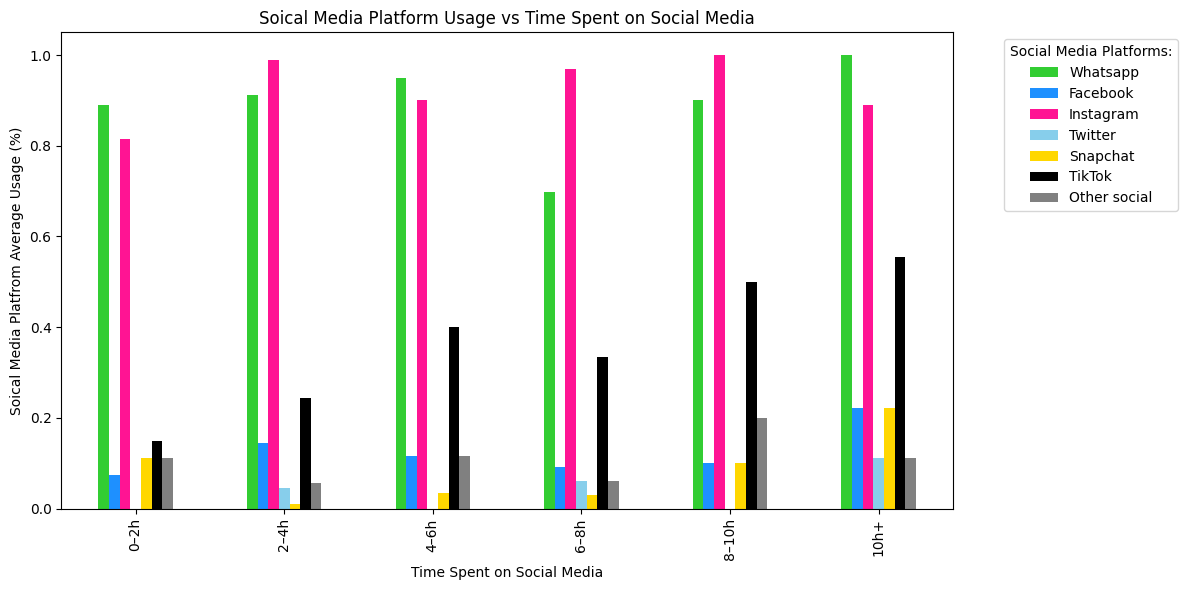

In [8]:
grouped_platform = df.groupby('Time Category')[platform_columns].mean()
grouped_platform = grouped_platform.reindex(ordered_categories)

ax = grouped_platform.plot(kind='bar', figsize=(12, 6), color=['limegreen', 'dodgerblue', 'deeppink', 'skyblue', 'gold', 'black', 'grey'])

plt.xlabel('Time Spent on Social Media')
plt.ylabel('Soical Media Platfrom Average Usage (%)')
plt.title('Soical Media Platform Usage vs Time Spent on Social Media')
plt.legend(title='Social Media Platforms:', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Correlation between Soical Media Platforms and Mental Health:

In [9]:
correlations = df[platform_columns + ['RSES']].corr()
self_esteem_corr = correlations['RSES'].drop('RSES')
correlations = df[platform_columns + ['BSMAS']].corr()
sm_addiction_corr = correlations['BSMAS'].drop('BSMAS')
correlations = df[platform_columns + ['Perceived anxiety during SM use']].corr()
anxiety_corr = correlations['Perceived anxiety during SM use'].drop('Perceived anxiety during SM use')

correlations = df[platform_columns + ['Perceived loneliness']].corr()
lonliness_corr = correlations['Perceived loneliness'].drop('Perceived loneliness')

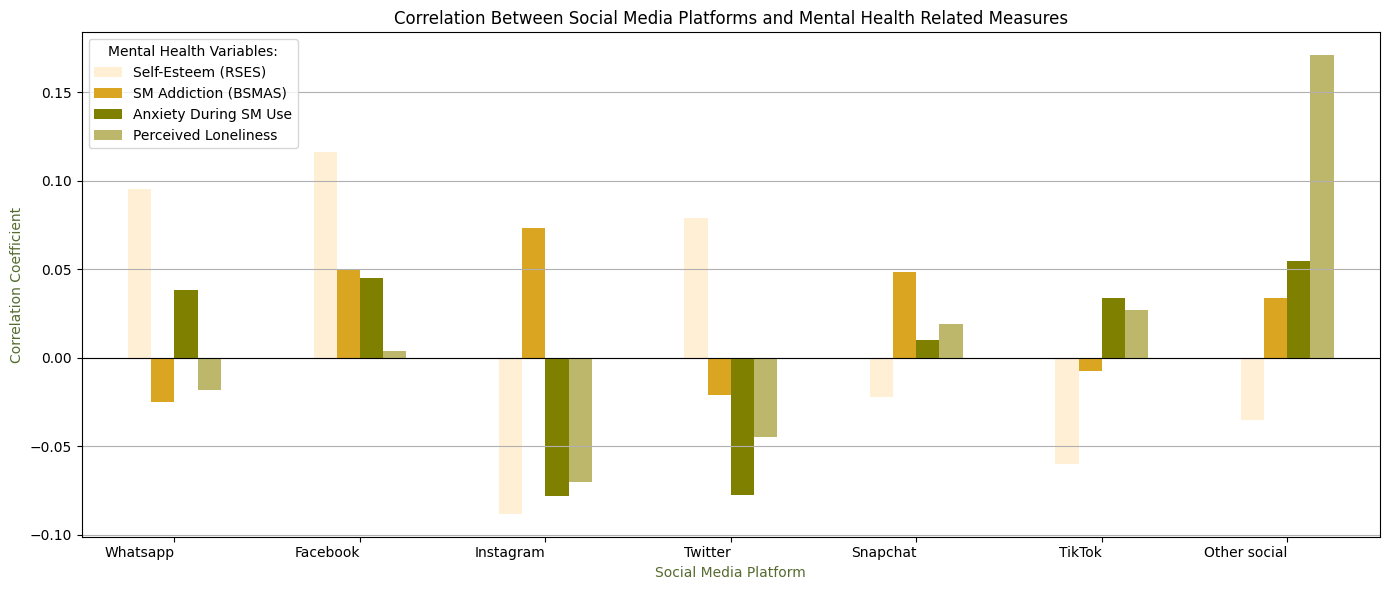

In [10]:
grouped_df = pd.DataFrame({'Self-Esteem (RSES)': self_esteem_corr,'SM Addiction (BSMAS)': sm_addiction_corr,'Anxiety During SM Use': anxiety_corr,'Perceived Loneliness': lonliness_corr})

ax = grouped_df.plot(kind='bar', figsize=(14, 6), color=['papayawhip', 'goldenrod', 'olive', 'darkkhaki'])
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Correlation Between Social Media Platforms and Mental Health Related Measures')
plt.xlabel('Social Media Platform', color='darkolivegreen')
plt.ylabel('Correlation Coefficient', color='darkolivegreen')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Mental Health Variables:')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### These Graphs shows:

- Whatsapp and Instagram are the most popular platforms
- There are more tiktok and snapchat users in those who spend more time on social media
- "other" platforms cause the most effect on mental health variables
- Twitter causes the least effect on mental health variables (it is also the least popular in this age range)
- There is a negative correlation between self=esteem and platforms related to sharing images and videos (TikTok, SnapChat and Instagram)
- Most social media platforms have a positive correlation with feeling anxious

# Compare Findings to Data about Adults and Social Media Usage:
---

In [11]:
df = pd.read_excel("/Users/farihaparvin/Downloads/Dataset 3 - Adults.xlsx", sheet_name='Cleansed Data', engine='openpyxl')

## Time spent on Social Media vs Feeling Depressed:
---

In [12]:
# labels for time catagories 

time_labels = {
    0: '0–1h',
    1: '1–2h',
    2: '2–3h',
    3: '3–4h',
    4: '4–5h',
    5: '5h+'
}
df['Time Category'] = df['Time Spent on Social Media (hrs)'].map(time_labels)

time_categories = ['0–1h', '1–2h', '2–3h', '3–4h', '4–5h', '5h+']

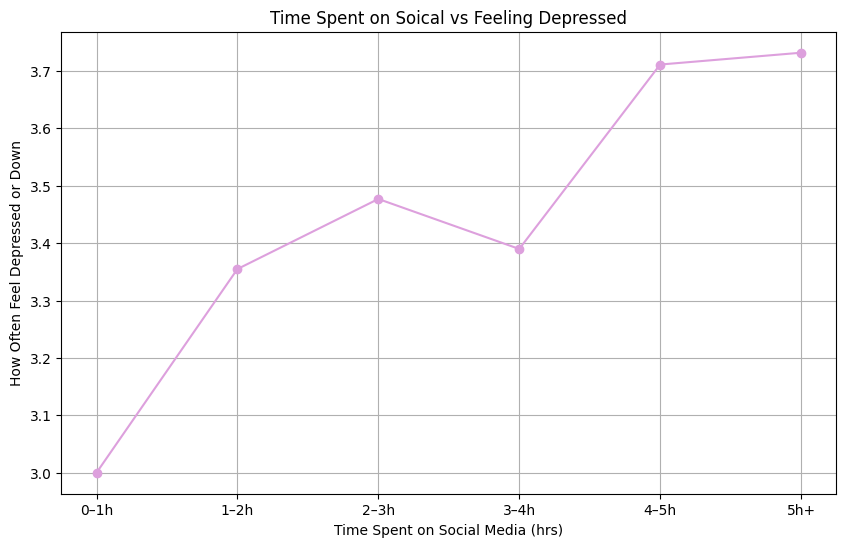

In [13]:
avg_depression = df.groupby('Time Category')[['How Often Feel Depressed or Down']].mean().reindex(time_categories)


plt.figure(figsize=(10, 6))
plt.plot(avg_depression.index, avg_depression['How Often Feel Depressed or Down'], marker='o', color='#DDA0DD')
plt.title('Time Spent on Soical vs Feeling Depressed')
plt.xlabel('Time Spent on Social Media (hrs)')
plt.ylabel('How Often Feel Depressed or Down')
plt.grid(True)
plt.show()

### This Graph Shows:
- The line graph shows that the more young adults spend on soical media, the the likely they are to feel depressed. 

## Time Spent on Socail Media based on Platforms and its Effects on Mental Health:
---

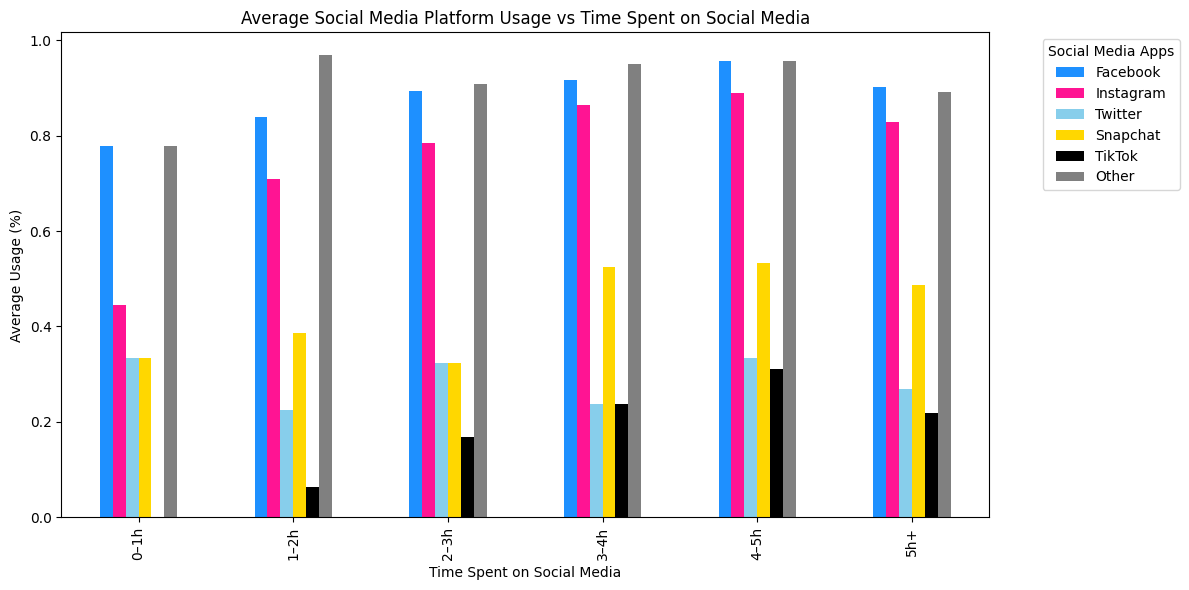

In [14]:
# Bar chart 

platform = ['Facebook', 'Instagram', 'Twitter', 'Snapchat', 'TikTok', 'Other']
grouped_platform = df.groupby('Time Category')[platform].mean()
grouped_platform = grouped_platform.reindex(time_categories)

ax = grouped_platform.plot(kind='bar', figsize=(12, 6),
                       color=['dodgerblue', 'deeppink', 'skyblue', 'gold', 'black', 'grey'])

plt.xlabel('Time Spent on Social Media')
plt.ylabel('Average Usage (%)')
plt.title('Average Social Media Platform Usage vs Time Spent on Social Media')
plt.legend(title='Social Media Apps', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


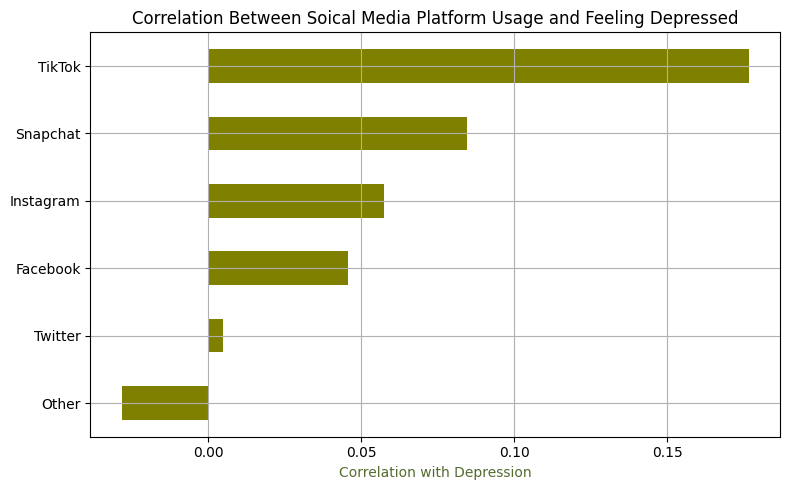

In [15]:
#

correlations = df[platform + ['How Often Feel Depressed or Down']].corr()
depression_corr = correlations['How Often Feel Depressed or Down'].drop('How Often Feel Depressed or Down')

plt.figure(figsize=(8, 5))
depression_corr.sort_values().plot(kind='barh', color='olive')
plt.title('Correlation Between Soical Media Platform Usage and Feeling Depressed')
plt.xlabel('Correlation with Depression', color='darkolivegreen')
plt.grid(True)
plt.tight_layout()
plt.show()

### These Graphs Show:
- Facebook, Instagram and "Other" social media platfroms are most popular amongst young adults
- The more time is spent on social media, the more likely they are to use TikTok and snapchat
- Tiktok has the highest positive correlation with feeling depressed
- All social media apps have a positive correlation with feeling depressed expect for "other" (which is the most popluar app catagory for this age range)

## EFFECTS OF SOCIAL MEDIA ON YOUNG ADULTS BASED ON GENDER:
---

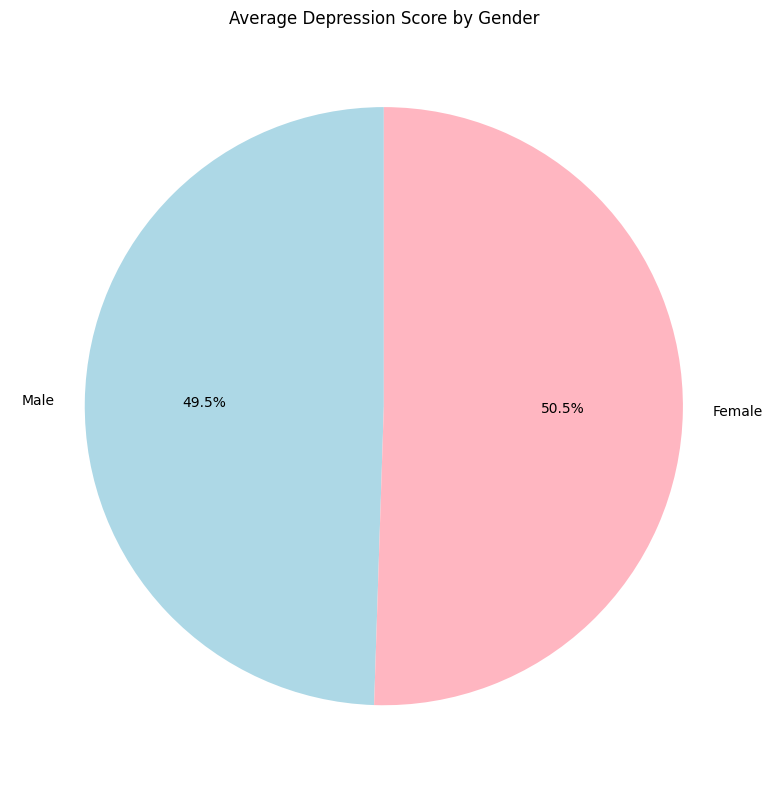

In [16]:
df['Sex'] = df['Sex'].map({1: 'Male', 2: 'Female'})
depression_by_sex= df.groupby('Sex')['How Often Feel Depressed or Down'].mean().sort_values()

plt.figure(figsize=(8, 8))
plt.pie(depression_by_sex, labels=depression_by_sex.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Average Depression Score by Gender')
plt.tight_layout()
plt.show()

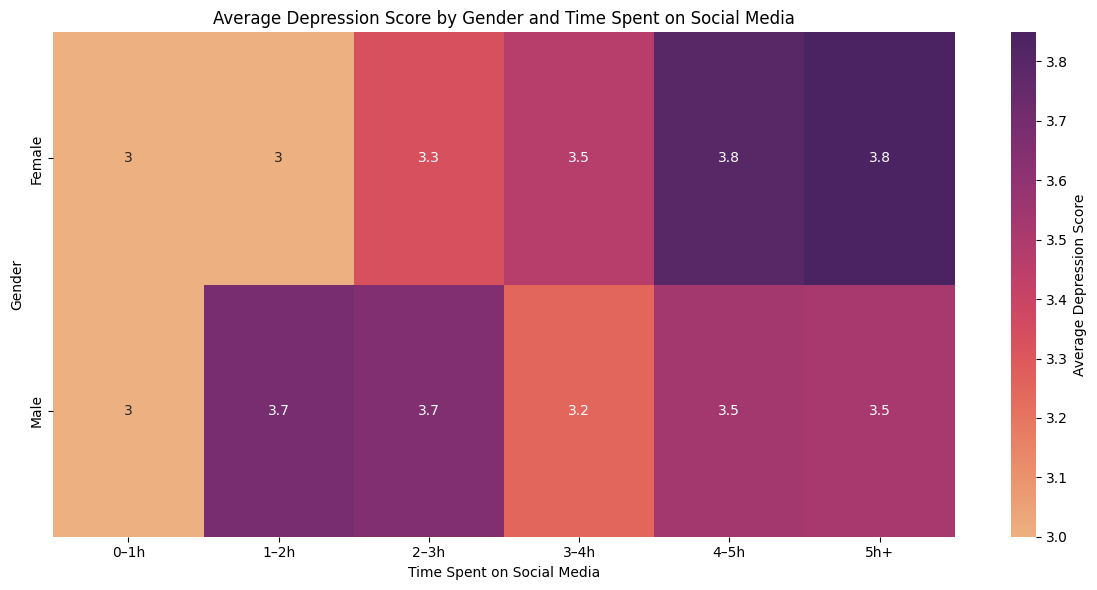

In [17]:
depression_by_sex_time = df.groupby(['Sex', 'Time Category'])['How Often Feel Depressed or Down'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(depression_by_sex_time, annot=True, cmap='flare', cbar_kws={'label': 'Average Depression Score'})
plt.title('Average Depression Score by Gender and Time Spent on Social Media')
plt.xlabel('Time Spent on Social Media')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

### These Graphs Show:
- There is a 50/50 chance in males and females to feel depressed in general
- When comparing that to time spend on social media, the heatmap shows there in a increase in females feeling depressed the more time they spend on social media.

## EFFECTS OF SOCIAL MEDIA ON YOUNG ADULTS BASED ON GENDER:
---